In [2]:
#%matplotlib widget

# conda install pythreejs

# Documentation: https://github.com/cihologramas/pyoptools/blob/master/Tutorial/Tutorial.ipynb

import math
from pyoptools.all import *

In [3]:
n_glass=1.5168 # BK7 glass


mobile_mirr = RoundMirror(radius= 25.4, thickness = 0.06, reflectivity = 0.99)

BS = BeamSplittingCube(size= 25.4, reflectivity=0.5,  material=material.lzos["BK8"])

L=IdealTLens(shape=Circular(radius=25.4), f=100, d=3)
#L1 = SphericalLens(radius=25.4, curvature_s1=470, curvature_s2=470, thickness=3, material=material.lzos["BK8"])


#S1=Spherical(curvature=1/100., shape=Circular(radius=20.))
#S2=Spherical(curvature=1/200., shape=Circular(radius=20.))

#S3=Cylinder(radius=20,length=6.997)

In [4]:
#L1=Component(surflist=[(S1, (0, 0, -5), (0, 0, 0)), (S2, (0, 0, 5), (0, math.pi, 0)), (S3,(0,0,.509),(0,0,0))], material=material.schott["BK7"])

In [5]:
ccd_straight=CCD(size=(10,10), transparent=False)

ccd_refl=CCD(size=(10,10), transparent=False)


In [6]:
laser_mirror_d = 200
mirror_bs_d = 200

S=System(complist=[(mobile_mirr, (0, 0, laser_mirror_d), (0, math.radians(45), 0)),
                   (BS, (-mirror_bs_d, 0, laser_mirror_d), (0, 0, 0)),
                   (ccd_straight, (-laser_mirror_d-40, 0, laser_mirror_d), (0, math.radians(90), 0)),
                   (L, (-mirror_bs_d, 0, laser_mirror_d+40), (0, 0, 0)),
                   (ccd_refl, (-mirror_bs_d, 0, laser_mirror_d+140), (0, 0, 0))], n=1)

In [7]:
#R=[Ray((0, 0, 0), (0, 0, 1)), Ray((10, 0, 0), (0, 0, 1)), Ray((-10, 0, 0), (0, 0, 1)),Ray((0, 10, 0), (0, 0, 1)), Ray((0, -10, 0), (0, 0, 1)),]
R=[Ray((0, 0, 0), (0, 0, 1))]

In [ ]:
S.ray_add(R)

In [9]:
S.propagate()

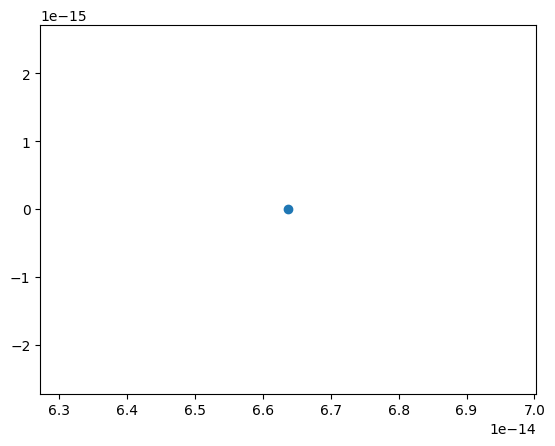

In [10]:
spot_diagram(ccd_straight)

In [11]:
# Extract hitpoint coordinates
for ray in ccd_straight.hit_list:
    print(ray[0])

(6.637536376482313e-14, 0.0, 0.0)


In [12]:
Plot3D(S)

Renderer(camera=OrthographicCamera(bottom=-100.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…